In [1]:
import warren_climatology as w99

import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
hs = w99.sample_grid('snow_depth', month=5)
swe = w99.sample_grid('swe', month=5)

In [3]:
hs

<xarray.DataArray (lat: 20, lon: 360)>
array([[22.215   , 20.528737, 18.847778, ..., 27.289754, 25.597099, 23.904984],
       [23.749861, 22.210764, 20.676428, ..., 28.381401, 26.836615, 25.29229 ],
       [25.200235, 23.801814, 22.407638, ..., 29.40813 , 28.004681, 26.60162 ],
       ...,
       [36.817341, 36.75018 , 36.683077, ..., 37.01885 , 36.951708, 36.884528],
       [36.915914, 36.885579, 36.855258, ..., 37.006884, 36.976579, 36.946252],
       [36.93    , 36.93    , 36.93    , ..., 36.93    , 36.93    , 36.93    ]])
Coordinates:
  * lat      (lat) float64 65.0 66.32 67.63 68.95 70.26 71.58 72.89 74.21 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...

In [4]:
swe

<xarray.DataArray (lat: 20, lon: 360)>
array([[ 7.255   ,  6.653822,  6.053543, ...,  9.05831 ,  8.457806,  7.856515],
       [ 7.715471,  7.16659 ,  6.618521, ...,  9.36191 ,  8.813638,  8.264656],
       [ 8.151357,  7.652479,  7.154329, ...,  9.64781 ,  9.149478,  8.650509],
       ...,
       [11.739515, 11.715251, 11.691006, ..., 11.812302, 11.788052, 11.763786],
       [11.78205 , 11.771065, 11.760088, ..., 11.815001, 11.804022, 11.793037],
       [11.8     , 11.8     , 11.8     , ..., 11.8     , 11.8     , 11.8     ]])
Coordinates:
  * lat      (lat) float64 65.0 66.32 67.63 68.95 70.26 71.58 72.89 74.21 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...

In [5]:
density = (swe * 1000.) / hs

density.max()

<xarray.DataArray ()>
array(176491.384884)

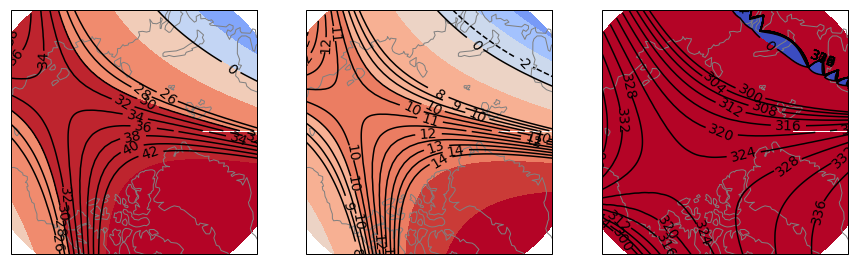

In [8]:
fig = plt.figure(figsize=(15,8))

#proj = ccrs.Stereographic(central_latitude=90., central_longitude=-90.)
proj = ccrs.NorthPolarStereo(central_longitude=-90.)
cmap = 'coolwarm'

ax0 = fig.add_subplot(131, projection=proj)
ax0.set_extent([0,359.9,70,90], ccrs.PlateCarree())
cs0 = ax0.contour(hs.lon, hs.lat, hs, transform=ccrs.PlateCarree(), colors='k', levels=[0,26,28,30,32,34,36,38,40,42])
cf0 = ax0.contourf(hs.lon, hs.lat, hs, cmap=cmap, vmin=-40, vmax=40, transform=ccrs.PlateCarree())
ax0.clabel(cs0, fmt='%2.0f', colors='k', fontsize=14)
ax0.coastlines(color='grey')

swelev = [-2,0]+list(np.arange(8.5,14.5,0.5))
ax1 = fig.add_subplot(132, projection=proj)
ax1.set_extent([0,359.9,70,90], ccrs.PlateCarree())
cs1 = ax1.contour(swe.lon, swe.lat, swe, transform=ccrs.PlateCarree(), colors='k', levels=swelev)
cf1 = ax1.contourf(swe.lon, swe.lat, swe, cmap=cmap, vmin=-20, vmax=20, transform=ccrs.PlateCarree())
ax1.clabel(cs1, fmt='%2.0f', colors='k', fontsize=14)
ax1.coastlines(color='grey')

dlev = [0]+list(range(300,340,4))
ax2 = fig.add_subplot(133, projection=proj)
ax2.set_extent([0.,359.9,70,90], ccrs.PlateCarree())
cs2 = ax2.contour(density.lon, density.lat, density, transform=ccrs.PlateCarree(), colors='k', levels=dlev)
cf2 = ax2.contourf(density.lon, density.lat, density, 20, cmap=cmap, vmin=-350, vmax=350, transform=ccrs.PlateCarree())
ax2.clabel(cs2, fmt='%2.0f', colors='k', fontsize=14)
ax2.coastlines(color='grey')

fig.savefig('warren_climatologies_may.png')